In [2]:
library(edgeR)
library(ggplot2)
library(ggrepel)
library(reshape2)
library(scales)
library(gridExtra)
library(biomaRt)
library(patchwork)
library(ComplexHeatmap)
library(circlize)
library(ggrastr)
library(plyr)
library(dplyr)
library(readxl) 
library(scales)
#library(extrafont)

In [24]:
df = read.csv("../data/220723_perturb_output.csv")
head(df)

,gene_transcript,gene,Non.targetting,replication,umap1,umap2,HBZ,SLC25A37,SPI1,CSF3R
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10005_ZBTB4_P1_ENSG00000174282,ZBTB4,targeting,non-replication,5.330689,-4.808454,0.7365825,0.33817577,0.032895923,-0.037527785
2,10006_ZBTB5_P1P2_ENSG00000168795,ZBTB5,targeting,non-replication,2.407954,3.550945,-0.1805923,0.03099556,0.005311812,0.032958716
3,10015_ZBTB8OS_P1P2_ENSG00000176261,ZBTB8OS,targeting,non-replication,6.815211,3.690921,-0.4477495,-0.04661835,0.077159840,0.002014941
4,10016_ZBTB9_P1P2_ENSG00000213588,ZBTB9,targeting,non-replication,3.890960,-3.447708,0.2873174,0.21149787,0.010326554,-0.021286467
5,1001_C17orf49_P1_ENSG00000258315,C17orf49,targeting,non-replication,3.542057,2.255487,0.7132413,0.39614978,-0.033731516,-0.036934566
6,10020_ZC3H13_P1P2_ENSG00000123200,ZC3H13,targeting,non-replication,5.164215,1.256519,-0.2849012,0.09788579,0.065474940,0.024495345


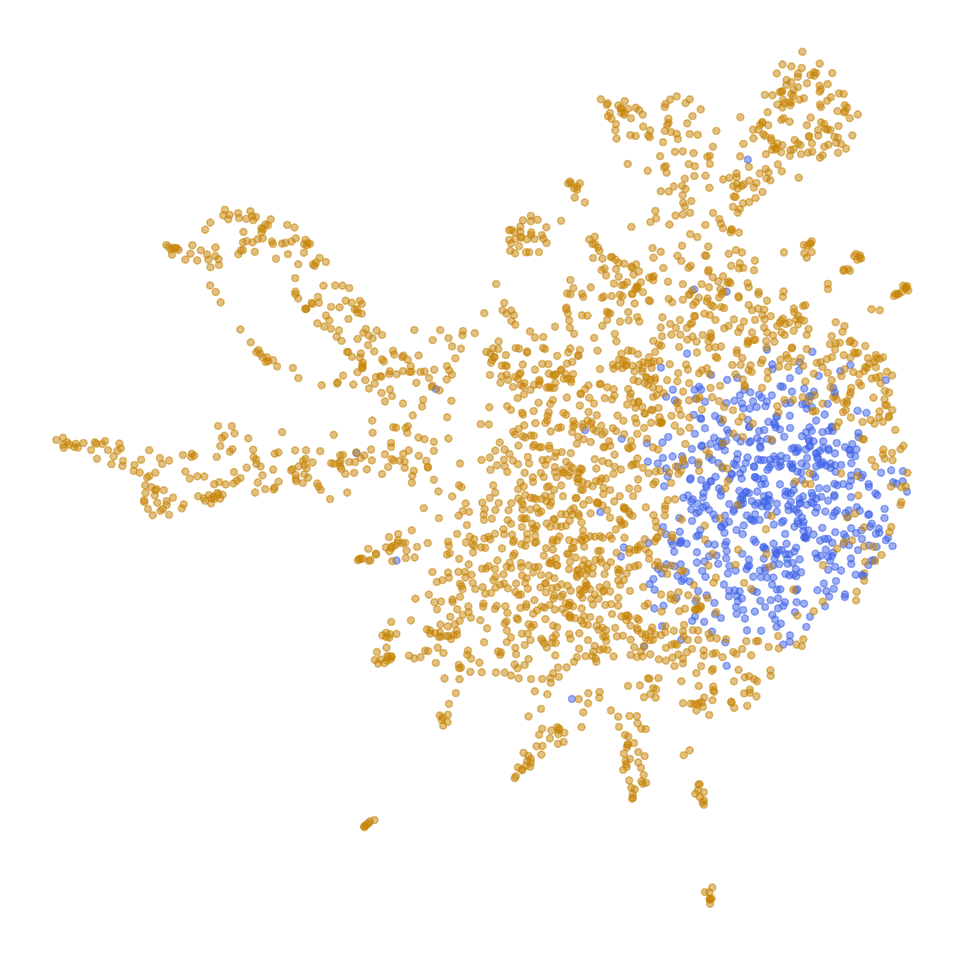

In [39]:
options(repr.plot.width=8, repr.plot.height=8)
ggplot(df, aes(x=umap1, y=umap2, color = Non.targetting)) + 
rasterize(geom_point(alpha=0.5), dpi=300) + theme_minimal() + 
scale_color_manual(values = c("targeting" = "#c88509",
                                "non-targeting"="#4165e9")) + 
theme(panel.grid.major = element_blank(),
     panel.grid.minor = element_blank(),
     panel.border = element_blank(),
     axis.line = element_blank(),
     axis.text = element_blank(),
     axis.title = element_blank(),
     legend.position = "none")
ggsave("../output/220723_targeting_umap.pdf", width=4, height=4)



In [28]:
subset(df, gene %in% c("GART", "GATA1", "GINS4", "INTS2", "INTS5", "KDM1A", "POLD3", "BCR"))

,gene_transcript,gene,Non.targetting,replication,umap1,umap2,HBZ,SLC25A37,SPI1,CSF3R
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1179,3286_GART_P1P2_ENSG00000159131,GART,targeting,replication,0.94768080,-4.315326700,1.98144880,1.0937045,0.086686010,0.005689752
1180,3291_GATA1_P1P2_ENSG00000102145,GATA1,targeting,non-replication,5.98593430,2.527535700,-0.03614473,-0.1344410,0.046762060,0.699556650
1197,3372_GINS4_P1P2_ENSG00000147536,GINS4,targeting,replication,-0.19823611,-4.327214700,1.72058700,1.1527652,-0.006271878,0.043414146
1356,4147_INTS2_P1P2_ENSG00000108506,INTS2,targeting,non-replication,2.52771640,-0.064214050,-0.01126199,0.2487863,0.309336570,0.179900180
1359,4150_INTS5_P1P2_ENSG00000185085,INTS5,targeting,non-replication,2.89604900,-0.090961084,0.35465837,0.1398301,0.325206160,0.583567500
1388,4317_KDM1A_P1P2_ENSG00000004487,KDM1A,targeting,non-replication,4.53635030,-0.004961855,-0.02397928,-0.2275458,0.501616800,0.655988040
1916,6517_POLD3_P1P2_ENSG00000077514,POLD3,targeting,replication,-0.07668132,-4.320096000,1.57953910,0.9198621,0.162695690,0.160217580
2362,812_BCR_P1P2_ENSG00000186716,BCR,targeting,non-replication,2.31765650,-4.494786700,1.73429200,0.7494469,-0.027680015,-0.028618290


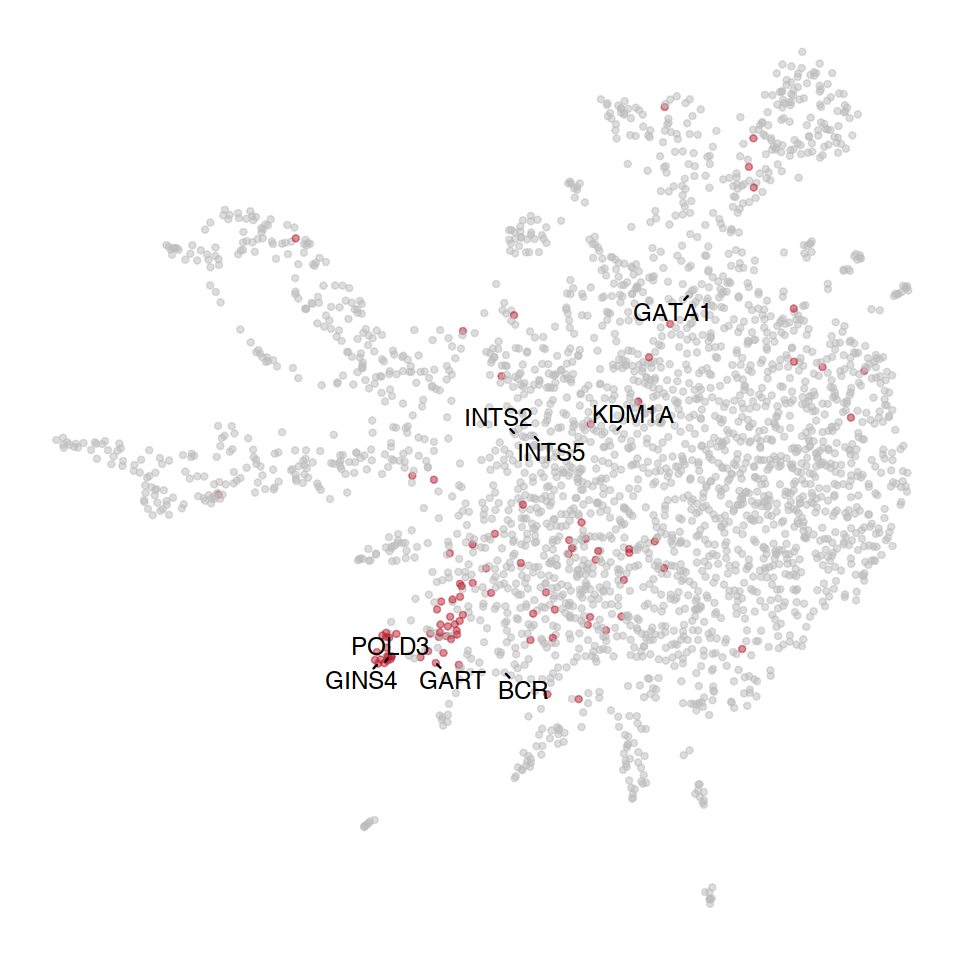

In [43]:
ggplot(df, aes(x=umap1, y=umap2, color = replication)) + 
rasterize(geom_point(alpha=0.5), dpi=300) + theme_minimal() + 
scale_color_manual(values = c("non-replication" = "grey",
                                "replication"="#BB2030")) + 
theme(panel.grid.major = element_blank(),
     panel.grid.minor = element_blank(),
     panel.border = element_blank(),
     axis.line = element_blank(),
     axis.text = element_blank(),
     axis.title = element_blank(),
     legend.position = "none") +
geom_text_repel(data = subset(df, gene %in% c("GART", "GATA1", "GINS4", "INTS2", "INTS5", "KDM1A", "POLD3", "BCR")),
aes(label = gene), color="black", size=5, min.segment.length = 0, point.padding=0)
ggsave("../output/220723_replication_umap.pdf", width=4, height=4)


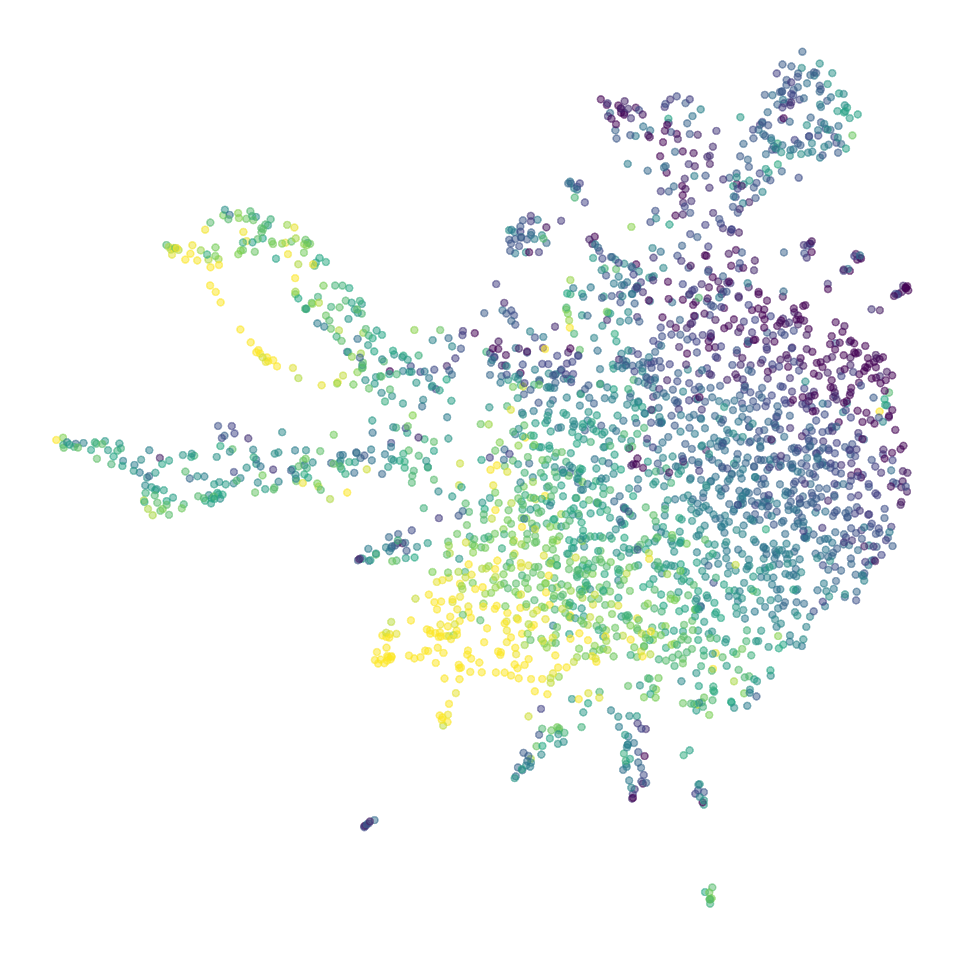

In [60]:
options(repr.plot.width=8, repr.plot.height=8)
ggplot(df, aes(x=umap1, y=umap2, color = HBZ)) + 
rasterize(geom_point(alpha=0.5), dpi=300) + theme_minimal() + 
scale_colour_viridis_c(limits = c(quantile(df$HBZ, 0.05)[[1]], quantile(df$HBZ, 0.95)[[1]]), oob = scales::squish) +
theme(panel.grid.major = element_blank(),
     panel.grid.minor = element_blank(),
     panel.border = element_blank(),
     axis.line = element_blank(),
     axis.text = element_blank(),
     axis.title = element_blank(),
     legend.position = "none")
ggsave("../output/220723_hbz_umap.pdf", width=4, height=4)



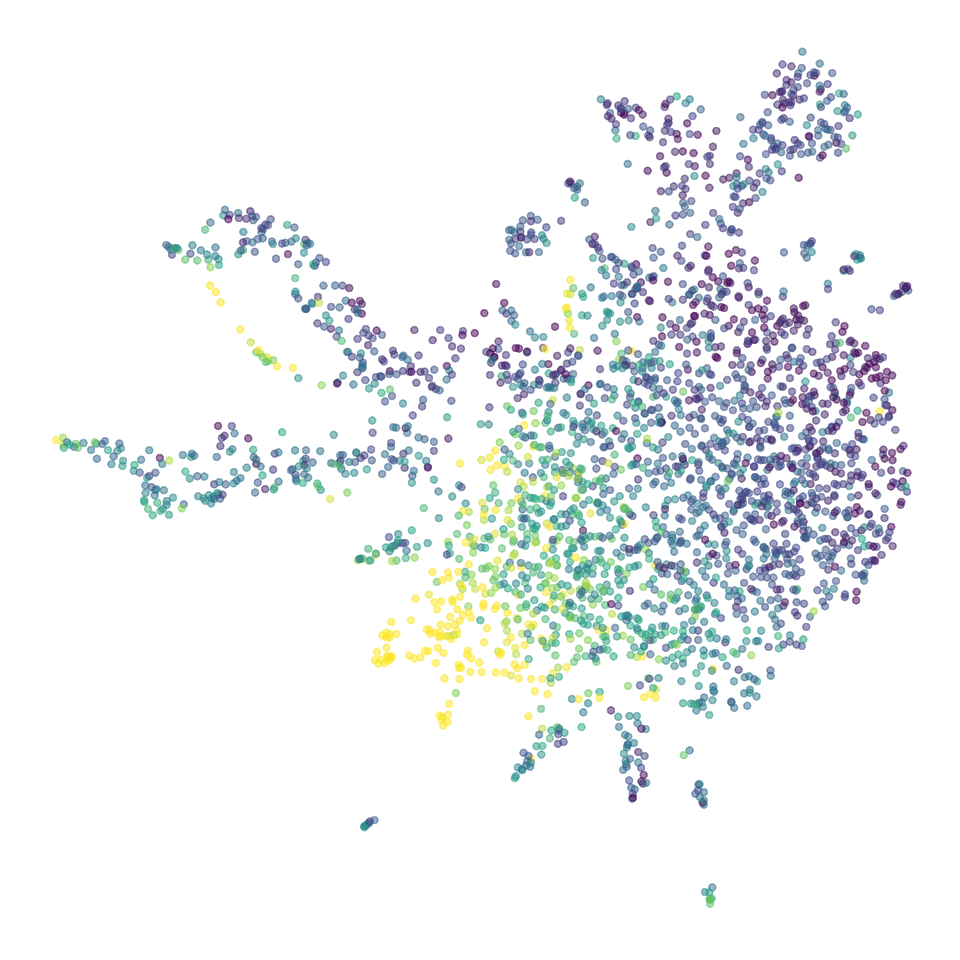

In [61]:
options(repr.plot.width=8, repr.plot.height=8)
ggplot(df, aes(x=umap1, y=umap2, color = SLC25A37)) + 
rasterize(geom_point(alpha=0.5), dpi=300) + theme_minimal() + 
scale_colour_viridis_c(limits = c(quantile(df$SLC25A37, 0.05)[[1]], quantile(df$SLC25A37, 0.95)[[1]]), oob = scales::squish) +
theme(panel.grid.major = element_blank(),
     panel.grid.minor = element_blank(),
     panel.border = element_blank(),
     axis.line = element_blank(),
     axis.text = element_blank(),
     axis.title = element_blank(),
     legend.position = "none")
ggsave("../output/220723_slc25a37_umap.pdf", width=4, height=4)



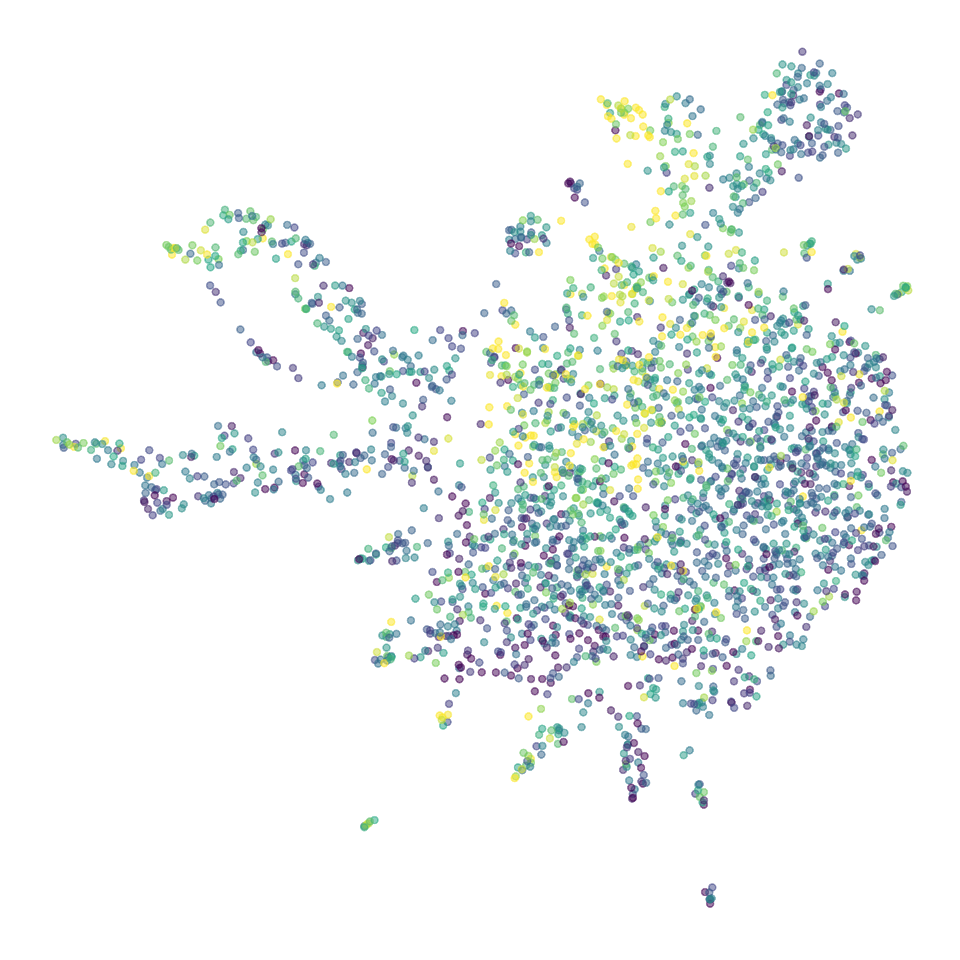

In [62]:
options(repr.plot.width=8, repr.plot.height=8)
ggplot(df, aes(x=umap1, y=umap2, color = SPI1)) + 
rasterize(geom_point(alpha=0.5), dpi=300) + theme_minimal() + 
scale_colour_viridis_c(limits = c(quantile(df$SPI1, 0.05)[[1]], quantile(df$SPI1, 0.95)[[1]]), oob = scales::squish) +
theme(panel.grid.major = element_blank(),
     panel.grid.minor = element_blank(),
     panel.border = element_blank(),
     axis.line = element_blank(),
     axis.text = element_blank(),
     axis.title = element_blank(),
     legend.position = "none")
ggsave("../output/220723_spi1_umap.pdf", width=4, height=4)



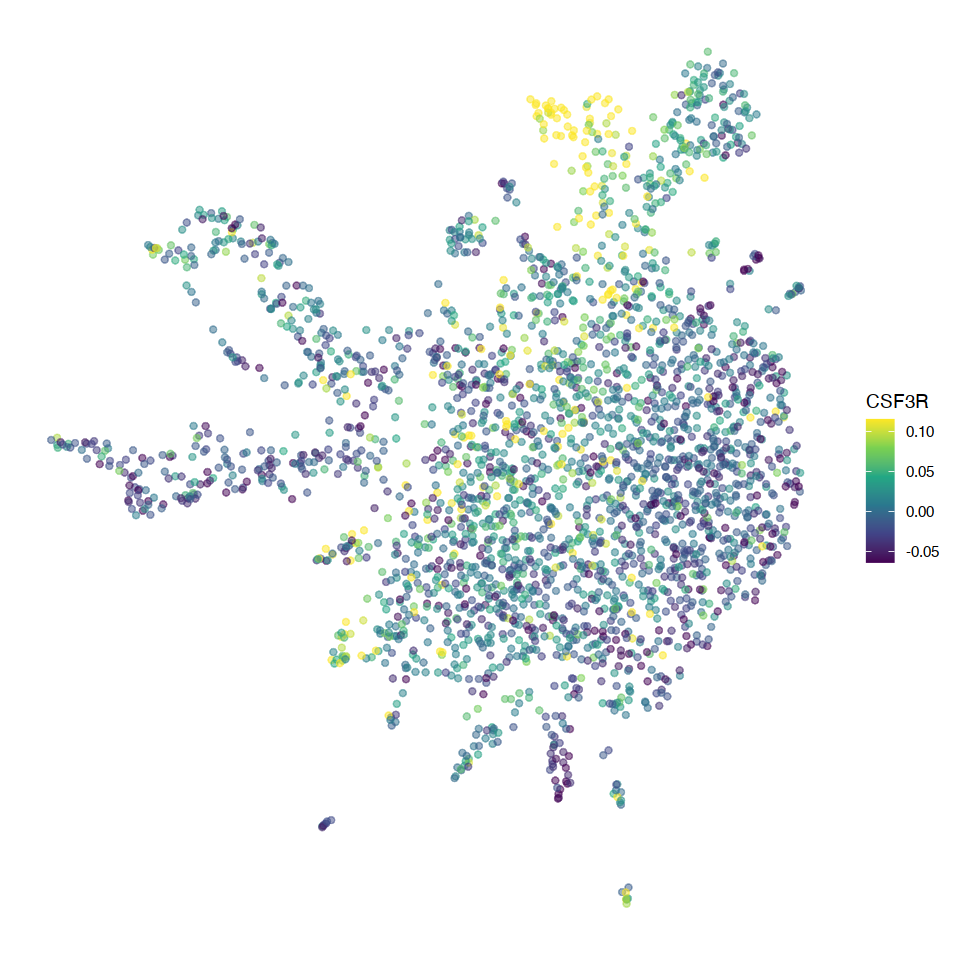

In [66]:
options(repr.plot.width=8, repr.plot.height=8)
ggplot(df, aes(x=umap1, y=umap2, color = CSF3R)) + 
rasterize(geom_point(alpha=0.5), dpi=300) + theme_minimal() + 
scale_colour_viridis_c(limits = c(quantile(df$CSF3R, 0.05)[[1]], quantile(df$CSF3R, 0.95)[[1]]), oob = scales::squish) +
theme(panel.grid.major = element_blank(),
     panel.grid.minor = element_blank(),
     panel.border = element_blank(),
     axis.line = element_blank(),
     axis.text = element_blank(),
     axis.title = element_blank())
ggsave("../output/220723_csf3r_umap_legend.pdf", width=4, height=4)



In [3]:
df = read.table("../data/220517_recalc_diff_scores.csv", header = TRUE, row.names=1, sep = ",")
#df$leidenCat <- factor(df$leiden)
head(df)

,UMI_count_unfiltered,num_cells_unfiltered,num_cells_filtered,control_expr,fold_expr,pct_expr,core_control,mean_leverage_score,std_leverage_score,energy_test_p_value,⋯,mitopercent,TE_ratio,cnv_score_z,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,gene,Erythrocyte.Score,Granulocyte.Score
,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>
4844_MARCH3_P1P2_ENSG00000173926,12022.34,67,61,0.0640519,0.44247630,-0.5575237,FALSE,0.61292062,1.2402502,0.00010000,⋯,0.1213135,0.01540483,4.5945957,8248,13113.13,0,0,3-Mar,0.35268968,0.25707194
4845_MARCH5_P1P2_ENSG00000198060,11084.40,190,184,0.2381251,0.06842397,-0.9315760,FALSE,0.20354963,0.9263262,0.37166283,⋯,0.1171839,0.01402528,-0.6814639,8248,11374.78,0,0,5-Mar,0.05766553,0.01334797
4846_MARCH6_P1P2_ENSG00000145495,11709.98,113,108,1.1443356,0.30140105,-0.6985990,FALSE,0.43920313,0.9842955,0.07489251,⋯,0.1188708,0.01412516,1.4830395,8248,12198.54,0,0,6-Mar,-0.02481387,0.10224652
4847_MARCH7_P1P2_ENSG00000136536,10936.08,167,159,0.8921829,0.35722190,-0.6427781,FALSE,0.42422490,1.0890418,0.00019998,⋯,0.1195118,0.01396995,0.6220123,8248,11433.88,0,0,7-Mar,-0.09023128,0.01896099
4848_MARCH8_P1P2_ENSG00000165406,11845.71,224,219,0.1425034,0.12055206,-0.8794479,FALSE,0.21939775,1.0841648,0.01909809,⋯,0.1128392,0.01358630,0.2720817,8248,12089.65,0,0,8-Mar,-0.05839402,0.02276786
4849_MARCH9_P1P2_ENSG00000139266,11306.06,52,51,0.1569212,0.00000000,-1.0000000,FALSE,0.00967006,0.8540450,0.23207679,⋯,0.1232514,0.01403618,-1.5692277,8244,11512.12,0,0,9-Mar,-0.08923387,-0.11090920


# Scatterplot

In [4]:
ontology_rep_stress = union(union(read.table("../data/erythroid_rep_stress_ontologies/GO-0006261.txt", 
                                             header = FALSE, row.names=1, sep = "\t")$V2, 
                              read.table("../data//erythroid_rep_stress_ontologies/GO-0045005.txt", 
                                         header = FALSE, row.names=1, sep = "\t")$V2), 
                        union(union(read.table("../data//erythroid_rep_stress_ontologies/GO-1903932.txt", 
                                                 header = FALSE, row.names=1, sep = "\t")$V2, 
                                    read.table("../data//erythroid_rep_stress_ontologies/R-HSA-8956320.tsv", 
                                                 header = TRUE, row.names=1, sep = "\t")$Gene.Name), 
                              read.table("../data/erythroid_rep_stress_ontologies/WP4022.csv", 
                                         header = TRUE, row.names=1, sep = ",")$genesymbol))
ontology_rep_stress = ontology_rep_stress[!grepl("_human", ontology_rep_stress)]
ontology_rep_stress = ontology_rep_stress[!grepl("POLR", ontology_rep_stress)]
ontology_rep_stress = ontology_rep_stress[!grepl("PELO", ontology_rep_stress)]
ontology_rep_stress = ontology_rep_stress[!grepl("PNPT1", ontology_rep_stress)]
length(ontology_rep_stress)
      

[1] 213

In [5]:
ontology_rep_stress[order(ontology_rep_stress)]

[1] "ADSL"               "ADSS1"              "ADSS2"             
  [4] "AICDA"              "ALYREF"             "ATAD5"             
  [7] "ATIC"               "ATR"                "ATRX"              
 [10] "BAZ1A"              "BCL6"               "BLM"               
 [13] "BOD1L1"             "BRCA2"              "CAD"               
 [16] "CCNE1"              "CCNE2"              "CDA"               
 [19] "CDC34"              "CDC45"              "CDC6"              
 [22] "CDC7"               "CDK2"               "CDK2AP1"           
 [25] "CDK9"               "CDT1"               "CENPS"             
 [28] "CENPX"              "CHTF18"             "CHTF8"             
 [31] "CIZ1"               "CMPK1"              "CMPK2"             
 [34] "CNOT6"              "CORT"               "CSDE1"             
 [37] "CTPS1"              "CTPS2"              "DACH1"             
 [40] "DBF4"               "DBF4B"              "DCK"               
 [43] "DCTD"               "DCTPP1"             "DDX11"             
 [46] "DDX21"              "DDX23"              "DHODH"             
 [49] "DNA2"               "DNAJA3"             "DONSON"            
 [52] "DPYD"               "DPYS"               "DRD2"              
 [55] "DRD3"               "DRD4"               "DSCC1"             
 [58] "DTYMK"              "DUT"                "E2F7"              
 [61] "E2F8"               "EME1"               "EME2"              
 [64] "ENDOG"              "ENPP1"              "ENPP3"             
 [67] "ENTPD1"             "ENTPD3"             "ETAA1"             
 [70] "EXD2"               "FAM111A"            "FANCM"             
 [73] "FBH1"               "FBXO5"              "FEN1"              
 [76] "GART"               "GEN1"               "GINS1"             
 [79] "GINS2"              "GINS3"              "GINS4"             
 [82] "GMNC"               "GMNN"               "GMPS"              
 [85] "HELB"               "HMGA1"              "IMPDH1"            
 [88] "IMPDH2"             "INO80"              "KAT7"              
 [91] "KHDC3L"             "LHPP"               "LIG1"              
 [94] "LIG3"               "LRWD1"              "MCIDAS"            
 [97] "MCM10"              "MCM2"               "MCM3"              
[100] "MCM4"               "MCM5"               "MCM6"              
[103] "MCM7"               "MCM9"               "MCMBP"             
[106] "METTL4"             "MGME1"              "MMS22L"            
[109] "MRE11"              "MUS81"              "NBN"               
[112] "NME1"               "NME1-NME2"          "NME2"              
[115] "NME3"               "NME4"               "NME6"              
[118] "NME7"               "NOC3L"              "NT5C"              
[121] "NT5M"               "NUCKS1"             "NUGGC"             
[124] "OOEP"               "ORC1"               "ORC2"              
[127] "ORC3"               "ORC4"               "ORC5"              
[130] "ORC6"               "PAICS"              "PCNA"              
[133] "PFAS"               "PNKP"               "POLA1"             
[136] "POLA2"              "POLB"               "POLD1"             
[139] "POLD2"              "POLD3"              "POLD4"             
[142] "POLE"               "POLE2"              "POLE3"             
[145] "POLE4"              "POLG"               "POLG2"             
[148] "POLN"               "POLQ"               "PPAT"              
[151] "PRIM1"              "PRIM2"              "PRIMPOL"           
[154] "PURA"               "RAD51"              "RECQL"             
[157] "RECQL4"             "RECQL5"             "REV3L"             
[160] "RFC1"               "RFC2"               "RFC3"              
[163] "RFC4"               "RFC5"               "RFWD3"             
[166] "RPA1"               "RPA4"               "RPAIN"             
[169] "RRM1"               "RRM2"               "RRM2B"             
[172] "RTEL1"              "RTF2"               "SAMHD1"            


In [6]:
ontologies <- c("GO:0006261", "GO:0045005", "GO:190393", "WP4022", "R-HSA-8956320", "R-HSA-69166", "GO:1903932")
df$replication.stress = df$gene %in% ontology_rep_stress
df$replication.stress = mapvalues(df$replication.stress, from = c(TRUE, FALSE), to = c("replication", "non-replication"))

Warning message:
“ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 17 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


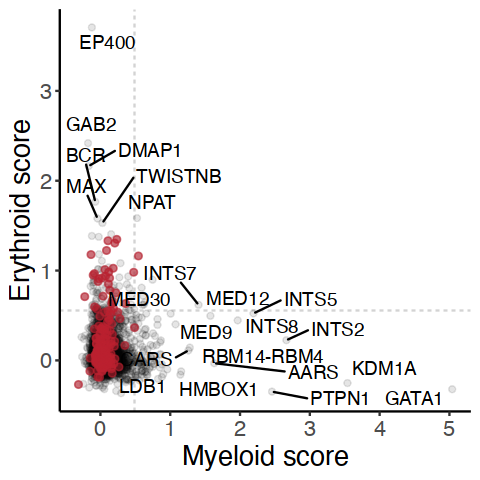

In [7]:
options(repr.plot.width=4, repr.plot.height=4)
ggplot(df, aes(x=Granulocyte.Score, y=Erythrocyte.Score)) +
geom_hline(yintercept=0.558, linetype = "dashed", color="lightgray") +
geom_vline(xintercept=0.487, linetype = "dashed", color="lightgray") +
rasterize(geom_point(alpha=0.1), dpi=300)  +
geom_point(data = subset(df, replication.stress == "replication"), color = "#BB2030", alpha = .6) + 
theme_bw() + theme(panel.grid.major = element_blank(),
                    panel.grid.minor = element_blank(),
                    panel.border = element_blank(),
                    axis.line = element_line(colour = "black")) + 
xlab("Myeloid score") + ylab("Erythroid score") + 
geom_text_repel(data=subset(df, Granulocyte.Score > 1 | Erythrocyte.Score > 1),
        aes(Granulocyte.Score,Erythrocyte.Score,label=gene), max.overlaps=15, force=20) + theme(text=element_text(size=16))

ggsave("../output/220517_k562_score_scatterplot.pdf", width=4, height=4)

Warning message:
“Removed 11115 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 157 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 157 rows containing missing values (`geom_text_repel()`).”
Warning message:
“Removed 11115 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 157 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 157 rows containing missing values (`geom_text_repel()`).”
Warning message:
“ggrepel: 16 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


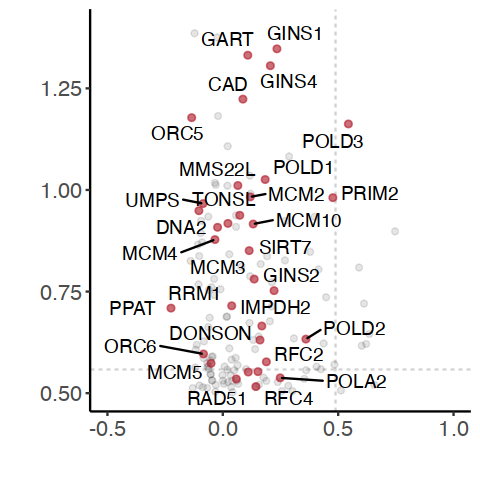

In [8]:
options(repr.plot.width=4, repr.plot.height=4)
ggplot(df, aes(x=Granulocyte.Score, y=Erythrocyte.Score)) +
geom_hline(yintercept=0.558, linetype = "dashed", color="lightgray") +
geom_vline(xintercept=0.487, linetype = "dashed", color="lightgray") +
rasterize(geom_point(alpha=0.1), dpi=300)  +
geom_point(data = subset(df, replication.stress == "replication"), color = "#BB2030", alpha = .6) + 
theme_bw() + theme(panel.grid.major = element_blank(),
                    panel.grid.minor = element_blank(),
                    panel.border = element_blank(),
                    axis.line = element_line(colour = "black")) + 
xlab("") + ylab("") + xlim(-0.5,1) + ylim(0.5,1.4) +
geom_text_repel(data=subset(df, replication.stress == "replication"),
        aes(Granulocyte.Score,Erythrocyte.Score,label=gene), max.overlaps=10, force=20) + theme(text=element_text(size=16))

ggsave("../output/220517_k562_score_scatterplot_inset.pdf", width=3, height=3)